<B>GRIP 2021</B>

<B>TASK-2(Data Science & Business Analytics Internship)</B>

<B>Made By: KUNAL ANAND</B>


# IRIS Dataset Implementation Decision Trees On The Dataset Aand Visualize Decision Tree

In [1]:
#importing libraray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sklearn.datasets as datasets
iris=datasets.load_iris()
X=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [33]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
X.shape

(150, 4)

In [6]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape,X_test.shape)

(112, 4) (38, 4)


In [7]:
print(y_train.shape,y_test.shape)

(112,) (38,)


In [8]:
# Scaling the independant variables by Standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Training Set

In [13]:
# Fitting Decision tree to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [14]:
# Predicting the Traning set results
y_pred_train = classifier.predict(X_train)
y_pred_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [15]:
#printing the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)*100

100.0

<B>PERFORMANCE MEASURES</B>

100.0

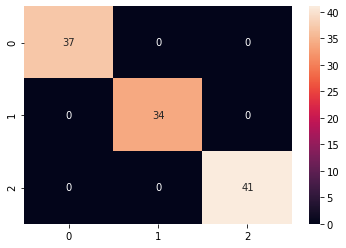

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True,fmt = "d")
accuracy_score(y_train, y_pred_train)*100

#Making the confusion matrix


In [23]:
#F1 Score with Precision and Recall-performance measure
from sklearn.metrics import classification_report
report = classification_report(y_train,y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        41

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



## Test Set

In [34]:
#Predicting the 4th line of train set 
print(classifier.predict(sc.transform([[4.7,3.2,1.3,0.2]])) )
#0 means that it belongs to IRIS-VERGINICA which is correctky predicted

[0]


In [31]:
#call predict method
Y_pred_test=classifier.predict(X_test)
a=pd.DataFrame(data={'predictions': Y_pred_test, 'actual': y_test})
a

,predictions,actual
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


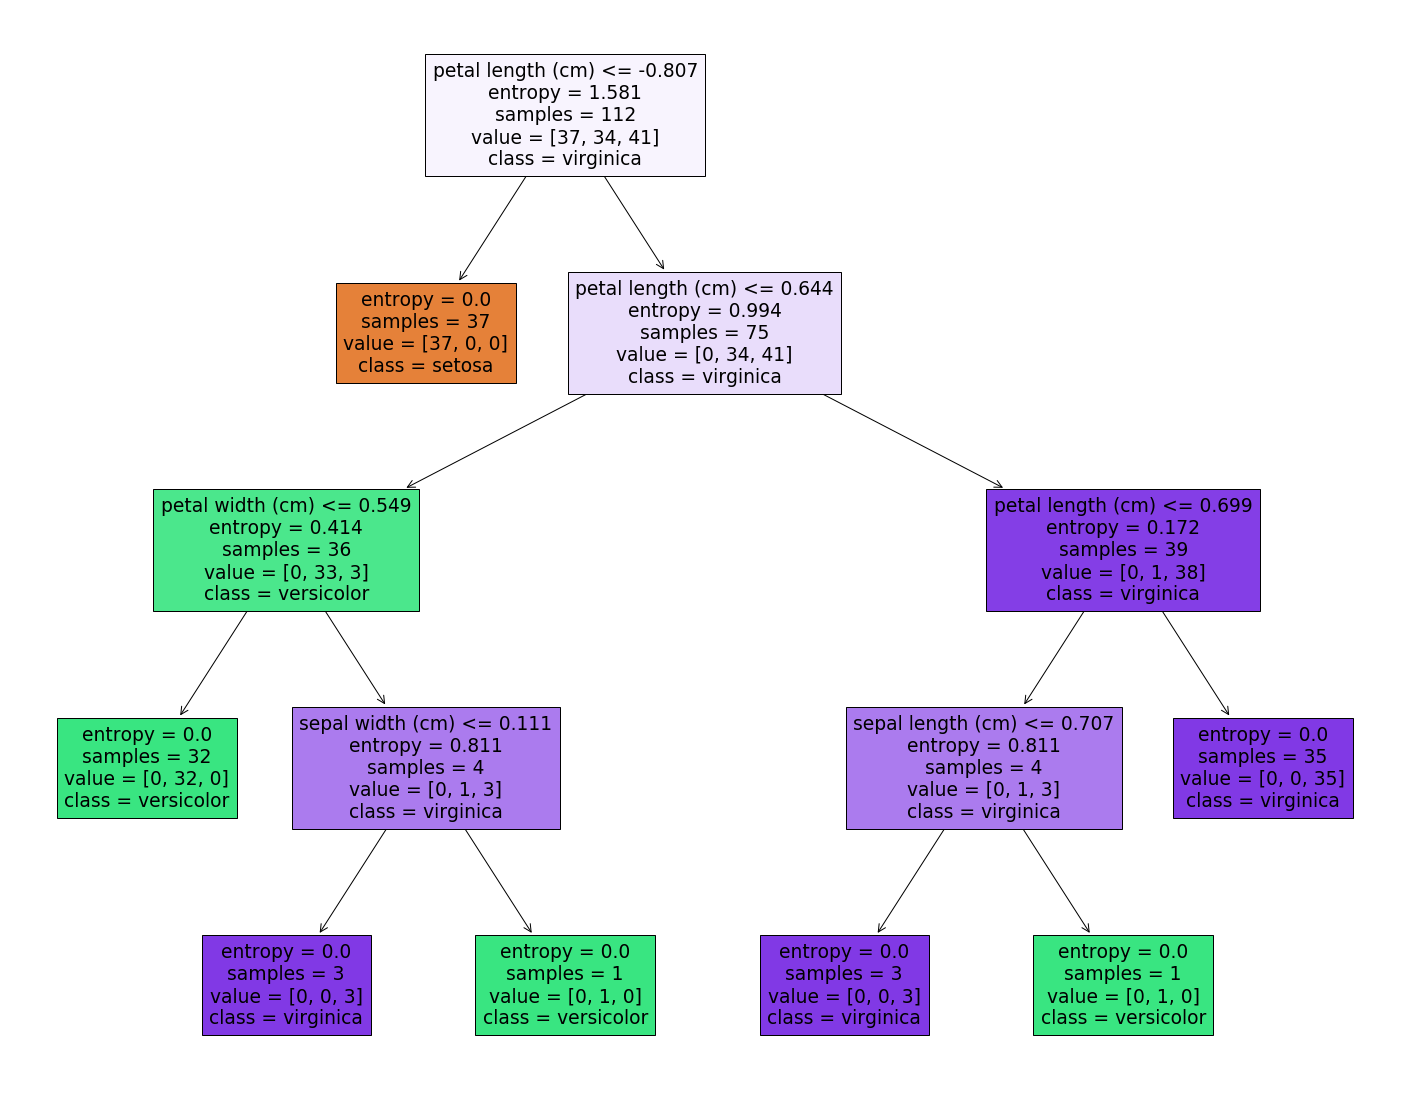

In [32]:
# Plotting decision tree for Test Set

from sklearn import tree
plt.figure(figsize=(25,20))
fig1 = tree.plot_tree(classifier, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

